In [ ]:
# Question 1
# Introduction:
# Special thanks to: https://github.com/justmarkham for sharing the dataset and
# materials.
# Occupations
# Step 1. Import the necessary libraries
# Step 2. Import the dataset from this address.
# Step 3. Assign it to a variable called users
# Step 4. Discover what is the mean age per occupation
# Step 5. Discover the Male ratio per occupation and sort it from the most to the least
# Step 6. For each occupation, calculate the minimum and maximum ages
# Step 7. For each combination of occupation and sex, calculate the mean age
# Step 8. For each occupation present the percentage of women and men


In [1]:
# Step 1
import pandas as pd

In [6]:
# Step 2
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'

In [7]:
# Step 3
users = pd.read_csv(url, sep='|')

In [8]:
# Step 4
users.groupby('occupation').age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [9]:
# Step 5
# Define a function to get the male ratio
def male_ratio(group):
    # Count the number of males
    num_males = (group['gender'] == 'M').sum()
    # Count the number of females
    num_females = (group['gender'] == 'F').sum()
    # Calculate the male ratio
    return num_males / (num_males + num_females)

# Apply the function to each occupation group and sort by male ratio
users.groupby('occupation').apply(male_ratio).sort_values(ascending=False)

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
dtype: float64

In [10]:
# Step 6
users.groupby('occupation').age.agg(['min', 'max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [11]:
# Step 7
users.groupby(['occupation', 'gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [13]:
# Step 8
# Define a function to get the percentage of females
def female_percentage(group):
    # Count the number of females
    num_females = (group['gender'] == 'F').sum()
    # Count the total number of people
    total = len(group)
    # Calculate the female percentage
    return (num_females / total) * 100

# Apply the function to each occupation group and calculate the male percentage as well
gender_percentages = users.groupby('occupation').apply(lambda group: pd.Series({
    'female_percentage': female_percentage(group),
    'male_percentage': 100 - female_percentage(group)
}))

# Print the gender_percentages dataframe
print(gender_percentages)

               female_percentage  male_percentage
occupation                                       
administrator          45.569620        54.430380
artist                 46.428571        53.571429
doctor                  0.000000       100.000000
educator               27.368421        72.631579
engineer                2.985075        97.014925
entertainment          11.111111        88.888889
executive               9.375000        90.625000
healthcare             68.750000        31.250000
homemaker              85.714286        14.285714
lawyer                 16.666667        83.333333
librarian              56.862745        43.137255
marketing              38.461538        61.538462
none                   44.444444        55.555556
other                  34.285714        65.714286
programmer              9.090909        90.909091
retired                 7.142857        92.857143
salesman               25.000000        75.000000
scientist               9.677419        90.322581


In [ ]:
# Question 2
# Euro Teams
# Step 1. Import the necessary libraries
# Step 2. Import the dataset from this address
# Step 3. Assign it to a variable called euro12
# Step 4. Select only the Goal column
# Step 5. How many team participated in the Euro2012?
# Step 6. What is the number of columns in the dataset?
# Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
# Step 8. Sort the teams by Red Cards, then to Yellow Cards
# Step 9. Calculate the mean Yellow Cards given per Team
# Step 10. Filter teams that scored more than 6 goals
# Step 11. Select the teams that start with G
# Step 12. Select the first 7 columns
# Step 13. Select all columns except the last 3
# Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [14]:
# Step 1
import pandas as pd

In [26]:
# Step 2 to 14
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro12 = pd.read_csv(url)

print("\n\nOnly the Goal Column: \n", euro12['Goals'])

print("\n\nTeams Participated: \n",len(euro12['Team'].unique()))

print("\n\nNumber of Columns: \n",len(euro12.columns))

discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
print("\n\nDiscipline: \n",discipline)

print("\n\nSort Based on Red and Yellow Card: \n", discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending=False))

print("\n\nMean for Yellow Cards: \n",discipline['Yellow Cards'].mean())

print("\n\nMore than 6 Goals: \n", euro12[euro12['Goals'] > 6]['Team'])

print("\n\nTeams starts with G: \n",euro12[euro12['Team'].str.startswith('G')]['Team'])

print("\n\nFirst 7 Columns: \n",euro12.iloc[:, :7])

print("\n\n All Columns Except Last Three: \n",euro12.iloc[:, :-3])

print("\n\nShooting Accuracy from England, Italy and Russia: \n",euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']])



Only the Goal Column: 
 0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64


Teams Participated: 
 16


Number of Columns: 
 35


Discipline: 
                    Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0


In [ ]:
# Question 3
# Housing
# Step 1. Import the necessary libraries
# Step 2. Create 3 differents Series, each of length 100, as follows:
# • The first a random number from 1 to 4
# • The second a random number from 1 to 3
# • The third a random number from 10,000 to 30,000
# Step 3. Create a DataFrame by joinning the Series by column
# Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
# Step 5. Create a one column DataFrame with the values of the 3 Series and assign it
# to 'bigcolumn'
# Step 6. Ops it seems it is going only until index 99. Is it true?
# Step 7. Reindex the DataFrame so it goes from 0 to 299

In [27]:
# Step 1 to 7
import pandas as pd
import numpy as np

s1 = pd.Series(np.random.randint(1, 5, size=100))
s2 = pd.Series(np.random.randint(1, 4, size=100))
s3 = pd.Series(np.random.randint(10000, 30001, size=100))

df = pd.concat([s1, s2, s3], axis=1)

df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

bigcolumn = pd.concat([s1, s2, s3], axis=0)

print(bigcolumn.tail())

df = df.reset_index(drop=True)
bigcolumn = bigcolumn.reset_index(drop=True)
print(df.head())
print(bigcolumn.head())

95    26880
96    16707
97    22744
98    27429
99    20832
dtype: int32
   bedrs  bathrs  price_sqr_meter
0      4       1            24750
1      2       2            17186
2      4       2            13837
3      2       3            21120
4      3       1            20413
0    4
1    2
2    4
3    2
4    3
dtype: int32


In [ ]:
# Question 4
# Wind Statistics
# The data have been modified to contain some missing values, identified by NaN.
# Using pandas should make this exercise easier, in particular for the bonus question.
# You should be able to perform all of these operations without using a for loop or
# other looping construct.
# The data in 'wind.data' has the following format:
# Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL
# MAL
# 61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
# 61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
# 61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71
# The first three columns are year, month, and day. The remaining 12 columns are
# average windspeeds in knots at 12 locations in Ireland on that day.
# Step 1. Import the necessary libraries
# Step 2. Import the dataset from the attached file wind.txt
# Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
# Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.
# Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
# Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.
# Step 7. Compute how many non-missing values there are in total.
# Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times. A single number for the entire dataset.
# Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days. A different set of numbers for each location.
# Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day. A different set of numbers for each day.
# Step 11. Find the average windspeed in January for each location.Treat January 1961 and January 1962 both as January.
# Step 12. Downsample the record to a yearly frequency for each location.
# Step 13. Downsample the record to a monthly frequency for each location.
# Step 14. Downsample the record to a weekly frequency for each location.
# Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on B January 2 1961) for the first 52 weeks.

In [31]:
# Step 1. Import the necessary libraries
import pandas as pd

# Step 2. Import the dataset from the attached file wind.txt
data = pd.read_csv('wind.txt', sep='\s+', parse_dates=[[0,1,2]])

# Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
data = data.set_index('Yr_Mo_Dy')

# Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.
def fix_century(x):
    year = x.year - 100 if x.year > 1989 else x.year
    return pd.to_datetime(year * 10000 + x.month * 100 + x.day, format='%Y%m%d')

data.index = data.index.map(fix_century)

# Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
data.index = pd.to_datetime(data.index)

# Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.
missing_values = data.isnull().sum()

# Step 7. Compute how many non-missing values there are in total.
num_non_missing = data.notnull().sum().sum()

# Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times. A single number for the entire dataset.
mean_windspeed = data.mean().mean()

# Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days
loc_stats = pd.DataFrame({
    'min': data.min(),
    'max': data.max(),
    'mean': data.mean(),
    'std': data.std()
})

# Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.
day_stats = pd.DataFrame({
    'min': data.min(axis=1),
    'max': data.max(axis=1),
    'mean': data.mean(axis=1),
    'std': data.std(axis=1)
})

# Step 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.
january_data = data[data.index.month == 1]
january_mean = january_data.mean()

# Print the average windspeed in January for each location
print(january_mean)

# Step 12. Downsample the record to a yearly frequency for each location.
yearly_data = data.resample('Y').mean()

# Step 13. Downsample the record to a monthly frequency for each location.
monthly_data = data.resample('M').mean()

# Step 14. Downsample the record to a weekly frequency for each location.
weekly_data = data.resample('W').mean()

print("Step 14. Weekly data:")
print(weekly_data.head())

# Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on B January 2 1961) for the first 52 weeks.
weekly_stats = weekly_data.loc['1961-01-02':'1961-12-31'].agg(['min', 'max', 'mean', 'std'])

print("Step 15. Weekly statistics for the first 52 weeks:")
print(weekly_stats)


RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64
Step 14. Weekly data:
                  RPT        VAL        ROS        KIL        SHA        BIR  \
Yr_Mo_Dy                                                                       
1961-01-01  15.040000  14.960000  13.170000   9.290000        NaN   9.870000   
1961-01-08  13.541429  11.486667  10.487143   6.417143   9.474286   6.435714   
1961-01-15  12.468571   8.967143  11.958571   4.630000   7.351429   5.072857   
1961-01-22  13.204286   9.862857  12.982857   6.328571   8.966667   7.417143   
1961-01-29  19.880000  16.141429  18.225714  12.720000  17.432857  14.828571   

                  DUB        CLA        MUL        CLO        BEL        MAL  
Yr_Mo_Dy                                                                      
1961-01-01  13.670000  10.250000  10.830

In [ ]:
# Question 5
# Step 1. Import the necessary libraries
# Step 2. Import the dataset from this address.
# Step 3. Assign it to a variable called chipo.
# Step 4. See the first 10 entries
# Step 5. What is the number of observations in the dataset?
# Step 6. What is the number of columns in the dataset?
# Step 7. Print the name of all the columns.
# Step 8. How is the dataset indexed?
# Step 9. Which was the most-ordered item?
# Step 10. For the most-ordered item, how many items were ordered?
# Step 11. What was the most ordered item in the choice_description column?
# Step 12. How many items were orderd in total?
# Step 13.
# • Turn the item price into a float
# • Check the item price type
# • Create a lambda function and change the type of item price
# • Check the item price type
# Step 14. How much was the revenue for the period in the dataset?
# Step 15. How many orders were made in the period?
# Step 16. What is the average revenue amount per order?
# Step 17. How many different items are sold?item_count = chipo.groupby('item_name').sum()
item_count = item_count.sort_values(['quantity'], ascending=False)
print(item_count.iloc[0]['quantity'])


In [32]:
import pandas as pd

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, delimiter = '\t')

chipo = pd.read_csv(url, delimiter = '\t')

print(chipo.head(10))

print(chipo.shape[0])

print(chipo.shape[1])

print(chipo.columns)

print(chipo.index)

item_count = chipo.groupby('item_name').sum()
item_count = item_count.sort_values(['quantity'], ascending=False)
print(item_count.index[0])

item_count = chipo.groupby('item_name').sum()
item_count = item_count.sort_values(['quantity'], ascending=False)
print(item_count.iloc[0]['quantity'])

choice_count = chipo.groupby('choice_description').sum()
choice_count = choice_count.sort_values(['quantity'], ascending=False)
print(choice_count.index[0])

total_items_orders = chipo.quantity.sum()
print(total_items_orders)

chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
print(chipo['item_price'].dtype)

revenue = (chipo['quantity'] * chipo['item_price']).sum()
print(revenue)

orders = chipo['order_id'].nunique()
print(orders)

# Solution 1
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
order_grouped = chipo.groupby(by=['order_id']).sum()
print(order_grouped.mean()['revenue'])

# Solution 2
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
average_revenue = chipo.groupby(by=['order_id']).sum().mean()['revenue']
print(average_revenue)

print(chipo['item_name'].nunique())

   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

In [ ]:
# Question 6
# Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend.

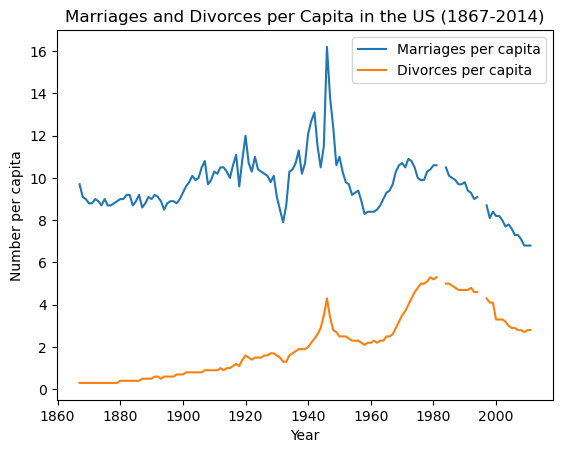

In [35]:
# Step 1
import pandas as pd
import matplotlib.pyplot as plt

# step 2
data = pd.read_csv('us-marriages-divorces-1867-2014.csv')

# Step 3
years = data['Year']
marriages = data['Marriages_per_1000']
divorces = data['Divorces_per_1000']


# Step 4
plt.plot(years, marriages, label='Marriages per capita')
plt.plot(years, divorces, label='Divorces per capita')

# Step 5
plt.xlabel('Year')
plt.ylabel('Number per capita')

# Step 5
plt.title('Marriages and Divorces per Capita in the US (1867-2014)')

# Step 6
plt.legend()
plt.show()

In [ ]:
# Question 7
# Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.
# Don't forget to label your axes!

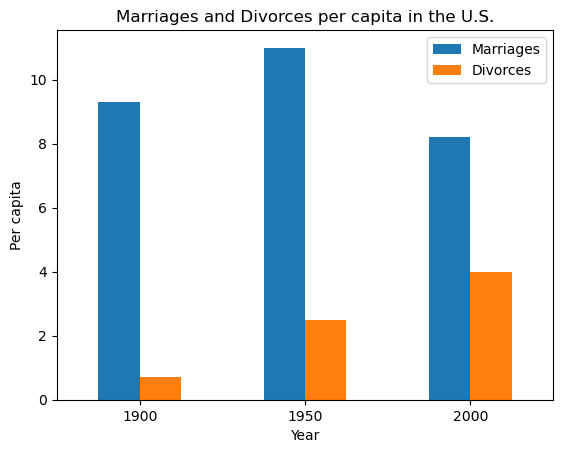

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

data = {'Year': [1900, 1950, 2000],
        'Marriages': [9.3, 11.0, 8.2],
        'Divorces': [0.7, 2.5, 4.0]}
df = pd.DataFrame(data)

ax = df.plot(x='Year', kind='bar', rot=0)

ax.set_xlabel("Year")
ax.set_ylabel("Per capita")
ax.set_title("Marriages and Divorces per capita in the U.S.")

plt.show()

In [ ]:
# Question 8
# Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name.
# Don't forget to label your axes!

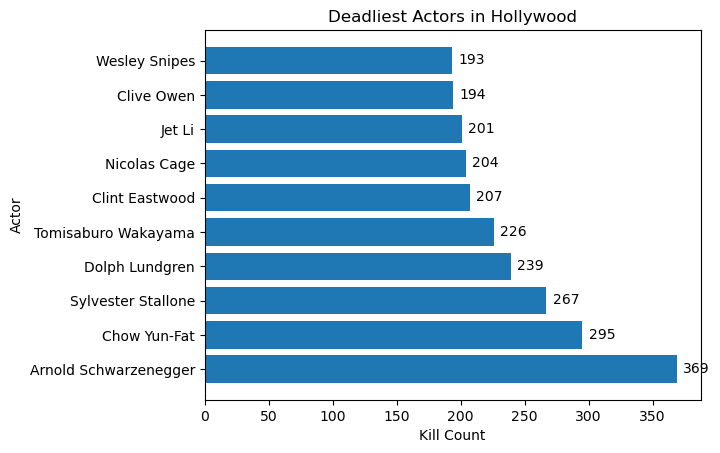

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV file
data = pd.read_csv('actor_kill_counts.csv')

# Sort data in descending order
data = data.sort_values('Count', ascending=False)

# Create horizontal bar chart
fig, ax = plt.subplots()
ax.barh(data['Actor'], data['Count'])

# Add labels and title
ax.set_xlabel('Kill Count')
ax.set_ylabel('Actor')
ax.set_title('Deadliest Actors in Hollywood')

# Add text labels for each bar
for i, v in enumerate(data['Count']):
    ax.text(v + 5, i - 0.1, str(v), color='black')

# Show chart
plt.show()


In [ ]:
# Question 9
# Create a pie chart showing the fraction of all Roman Emperors that were assassinated.
# Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

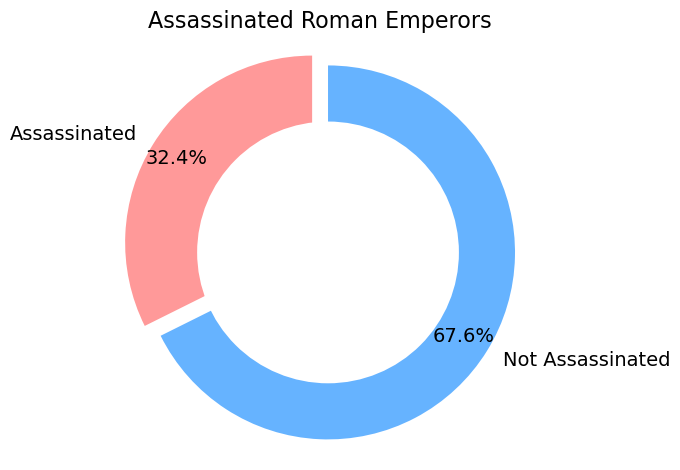

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Read data from CSV file
data = pd.read_csv('roman-emperor-reigns.csv')

# Calculate the number of assassinated emperors and total emperors
num_assassinated = len(data[data['Cause_of_Death'] == 'Assassinated'])
total_emperors = len(data)

# Calculate the percentage of assassinated emperors
percent_assassinated = num_assassinated / total_emperors * 100

# Create pie chart
labels = ['Assassinated', 'Not Assassinated']
sizes = [percent_assassinated, 100 - percent_assassinated]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode 1st slice
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, textprops={'fontsize': 14})
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Add title
ax1.set_title('Assassinated Roman Emperors', fontsize=16)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  

# Show chart
plt.tight_layout()
plt.show()


In [ ]:
# Question 10
# Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.
# Don't forget to label your axes!
# Color each dot according to its year.

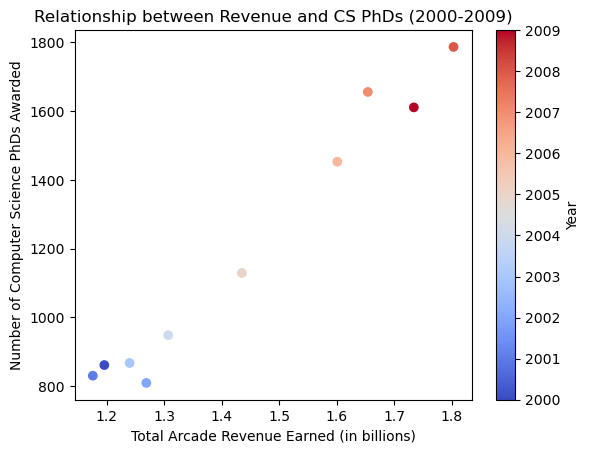

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

# Load data from CSV file
data = pd.read_csv('arcade-revenue.csv')

# Extract data columns
year = data['Year']
revenue = data['Total Arcade Revenue (billions)']
phds = data['Computer Science Doctorates Awarded (US)']

# Create scatter plot
fig, ax = plt.subplots()
scatter = ax.scatter(revenue, phds, c=year, cmap='coolwarm')

# Add labels and title
ax.set_xlabel('Total Arcade Revenue Earned (in billions)')
ax.set_ylabel('Number of Computer Science PhDs Awarded')
ax.set_title('Relationship between Revenue and CS PhDs (2000-2009)')

# Add colorbar
cbar = fig.colorbar(scatter)
cbar.set_label('Year')

# Show chart
plt.show()